In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('../data/AviationData.csv', encoding='latin-1')
df.head()

c:\Users\nateh\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [80]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [81]:
#make a Year column
df['Year'] = df['Event.Date'].dt.year


In [82]:
df['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [83]:
# Events with null locations
df_null_locations = df[df['Location'].isna()].copy()
df_null_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 4239 to 63709
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                52 non-null     object        
 1   Investigation.Type      52 non-null     object        
 2   Accident.Number         52 non-null     object        
 3   Event.Date              52 non-null     datetime64[ns]
 4   Location                0 non-null      object        
 5   Country                 51 non-null     object        
 6   Latitude                5 non-null      object        
 7   Longitude               5 non-null      object        
 8   Airport.Code            2 non-null      object        
 9   Airport.Name            2 non-null      object        
 10  Injury.Severity         52 non-null     object        
 11  Aircraft.damage         45 non-null     object        
 12  Aircraft.Category       9 non-null      object

In [84]:
df['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [85]:
df.groupby('Aircraft.Category').count()['Event.Id'].sort_values(ascending=False).head(10)

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Name: Event.Id, dtype: int64

In [86]:
df.groupby('Make').count()['Event.Id'].sort_values(ascending=False).tail(20)

Make
Mikowski                    1
Mikoyan                     1
Mikoyan Gurevich            1
Mil                         1
Mil Design Bureau           1
Milentz                     1
Miles Atwood                1
Mileski                     1
Milholland                  1
Miller Air Sports           1
Miller, John                1
Miller, Terry W.            1
Miller/bell                 1
Milliken                    1
Milner, Dick G              1
Miltenberger                1
Mince                       1
Miner                       1
Mingess-bennett             1
107.5 Flying Corporation    1
Name: Event.Id, dtype: int64

In [87]:
#Making everything in the df lowercase so we can get more accurate counts.
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
df.head(10)



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218x45444,accident,sea87la080,1948-10-24,"moose creek, id",united states,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,unk,cruise,probable cause,NaN,1948
1,20001218x45447,accident,lax94la336,1962-07-19,"bridgeport, ca",united states,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,unk,unknown,probable cause,19-09-1996,1962
2,20061025x01555,accident,nyc07la005,1974-08-30,"saltville, va",united states,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,imc,cruise,probable cause,26-02-2007,1974
3,20001218x45448,accident,lax96la321,1977-06-19,"eureka, ca",united states,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,imc,cruise,probable cause,12-09-2000,1977
4,20041105x01764,accident,chi79fa064,1979-08-02,"canton, oh",united states,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,vmc,approach,probable cause,16-04-1980,1979
5,20170710x52551,accident,nyc79aa106,1979-09-17,"boston, ma",united states,42.4453,-70.7583,NaN,NaN,...,air canada,NaN,NaN,1.0,44.0,vmc,climb,probable cause,19-09-2017,1979
6,20001218x45446,accident,chi81la106,1981-08-01,"cotton, mn",united states,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,imc,unknown,probable cause,06-11-2001,1981
7,20020909x01562,accident,sea82da022,1982-01-01,"pullman, wa",united states,NaN,NaN,NaN,blackburn ag strip,...,NaN,0.0,0.0,0.0,2.0,vmc,takeoff,probable cause,01-01-1982,1982
8,20020909x01561,accident,nyc82da015,1982-01-01,"east hanover, nj",united states,NaN,NaN,n58,hanover,...,NaN,0.0,0.0,0.0,2.0,imc,landing,probable cause,01-01-1982,1982
9,20020909x01560,accident,mia82da029,1982-01-01,"jacksonville, fl",united states,NaN,NaN,jax,jacksonville intl,...,NaN,0.0,0.0,3.0,0.0,imc,cruise,probable cause,01-01-1982,1982


In [88]:
#More accurate 'Make' counts
df.groupby('Make').count()['Event.Id'].sort_values(ascending=False).tail(50)

Make
moore edward r                    1
moore glenn                       1
moore joseph o                    1
moore sammie                      1
moore thomas o                    1
moore-van                         1
morehead                          1
morelli                           1
morgan james e                    1
morgan t. melton                  1
morgan, marvin r.                 1
moriarty marvin                   1
mork                              1
morley                            1
mormile francis w                 1
morphew                           1
morris                            1
morris b. stephens                1
morris george                     1
morris thomas lee                 1
morrison joseph                   1
morrison marvin e jr              1
morrison rocky v                  1
moore david                       1
moore byron j                     1
moore bell                        1
monnett - larsen                  1
moffitt oscar/ kit pros

In [89]:
#check out make
#loc into all the cessna entries and see what it looks like
#use injury to make a serverity score
#or check out freq of fatal injuries relative to accidefnts

In [90]:
df.groupby('Purpose.of.flight').count()['Event.Id'].sort_values(ascending=False).tail(10)

Purpose.of.flight
air race show              99
public aircraft - local    74
public aircraft - state    64
air race/show              59
glider tow                 53
firefighting               40
air drop                   11
asho                        6
pubs                        4
publ                        1
Name: Event.Id, dtype: int64

<AxesSubplot:>

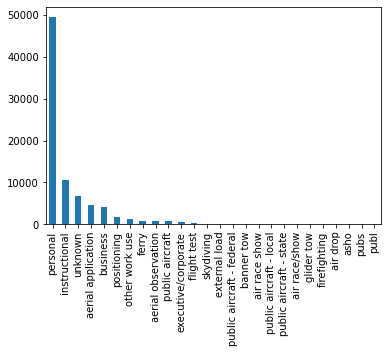

In [91]:
df['Purpose.of.flight'].value_counts().plot(kind='bar')
#So far and away the most common purpose of flight (for which an accident occurs) is personal/instructional



In [92]:
#Now grouping by FAR regulations. See here for more info: https://pilotinstitute.com/part-91-vs-121-vs-135/
df_far = df.groupby('FAR.Description').count()['Event.Id'].sort_values(ascending=False)
df_far.head(10)

FAR.Description
091                              18221
part 91: general aviation         6486
nusn                              1584
nusc                              1013
137                               1010
135                                746
121                                679
part 137: agricultural             437
unk                                371
part 135: air taxi & commuter      298
Name: Event.Id, dtype: int64

In [93]:
#So we first need to clean up this column using a .replace()

df['FAR.Description'] = df['FAR.Description'].replace({
    '091': 'part 91',
    'part 91: general aviation': 'part 91',
    '137': 'part 137',
    '135': 'part 135',
    '121': 'part 121',
    'part 137: agricultural': 'part 137',
    'part 135: air taxi & commuter': 'part 135',
    '129': 'part 129',
    'part 121: air carrier': 'part 121',
    '133': 'part 133',
    'part 129: foreign': 'part 129',
    'part 133: rotorcraft external load': 'part 133',
    'part 133: rotorcraft ext. load': 'part 133',
    '125' : 'part 125',
    'part 125: 20+ pax,6000+ lbs': 'part 125',
    '107': 'part 107',
    '103': 'part 103',
    '437': 'part 437',
    'part91f': 'part 91',
    'part 91 subpart f': 'part 91',
    'part 91f: special flt ops.': 'part 91',
    'part 91 subpart k: fractional': 'part 91',
    '091k': 'part 91',
}
)

df['FAR.Description'].value_counts()

# Need to figure out what the other FAR descriptions are, e.g. nusn/nusc/unk

part 91                     24723
nusn                         1584
part 137                     1447
part 135                     1044
nusc                         1013
part 121                      844
unk                           371
part 129                      346
pubu                          253
part 133                      139
non-u.s., non-commercial       97
non-u.s., commercial           93
unknown                        22
public use                     19
part 125                       10
armf                            8
part 107                        4
public aircraft                 2
part 103                        2
armed forces                    1
part 437                        1
Name: FAR.Description, dtype: int64

In [94]:
# Need to get this to include the unknowns, too.

df_far_filtered = df[df['FAR.Description'].str.contains('part').fillna(False)].copy()
df_far_filtered['FAR.Description'].value_counts()


part 91     24723
part 137     1447
part 135     1044
part 121      844
part 129      346
part 133      139
part 125       10
part 107        4
part 103        2
part 437        1
Name: FAR.Description, dtype: int64

In [95]:
df['Air.carrier'].value_counts().head(10)


pilot                    258
american airlines         90
united airlines           89
delta air lines           53
delta air lines inc       44
southwest airlines co     44
american airlines inc     36
on file                   33
ryanair                   27
private individual        27
Name: Air.carrier, dtype: int64

In [96]:
# Going to take a look at the 'Purpose.of.flight' column and try to bin appropriately

df['Purpose.of.flight'].value_counts()



personal                     49448
instructional                10601
unknown                       6802
aerial application            4712
business                      4018
positioning                   1646
other work use                1264
ferry                          812
aerial observation             794
public aircraft                720
executive/corporate            553
flight test                    405
skydiving                      182
external load                  123
public aircraft - federal      105
banner tow                     101
air race show                   99
public aircraft - local         74
public aircraft - state         64
air race/show                   59
glider tow                      53
firefighting                    40
air drop                        11
asho                             6
pubs                             4
publ                             1
Name: Purpose.of.flight, dtype: int64

In [97]:
df['purpose_binned'] = df['Purpose.of.flight'].replace(
    ['public aircraft', 'public aircraft - federal', 'public aircraft - state', 'public aircraft - local', 'public aircraft - u.s. govt.'], 'public')



df['purpose_binned'].value_counts()

personal               49448
instructional          10601
unknown                 6802
aerial application      4712
business                4018
positioning             1646
other work use          1264
public                   963
ferry                    812
aerial observation       794
executive/corporate      553
flight test              405
skydiving                182
external load            123
banner tow               101
air race show             99
air race/show             59
glider tow                53
firefighting              40
air drop                  11
asho                       6
pubs                       4
publ                       1
Name: purpose_binned, dtype: int64

In [98]:

pd.set_option('display.max_rows', 1000)




In [99]:
df.groupby(['purpose_binned', 'FAR.Description']).count()

# aerial application mostly corresponds to part 137, which is agricultural, so we can bin that as agricultural.
# aerial observation mostly corresponds to part 91, which is general aviation/personal (and maybe instructional?)
# business also mostly falls under part 91, so will need to separate that from personal aviation, which falls under the same category.
# so maybe group aerial application / business / work / banner tow / skydiving (because business)? may also want executive/ferry there if not separate cat
# and then separate out personal aviation and instructional?


 

Event.Id  Investigation.Type  \
purpose_binned      FAR.Description                                          
aerial application  non-u.s., non-commercial         5                   5   
                    nusc                             7                   7   
                    nusn                            50                  50   
                    part 133                         1                   1   
                    part 137                      1312                1312   
                    part 91                         11                  11   
                    public use                       1                   1   
                    pubu                             5                   5   
aerial observation  non-u.s., non-commercial         5                   5   
                    nusc                             1                   1   
                    nusn                            27                  27   
                    part 135                         4                   4   
                    part 137                         5                   5   
                    part 91                        288                 288   
                    public use                       1                   1   
                    pubu                            11                  11   
air drop            non-u.s., non-commercial         1                   1   
                    nusn                             1                   1   
                    part 91                          6                   6   
air race show       nusn                            15                  15   
                    part 91                         84                  84   
air race/show       part 91                         11                  11   
asho                part 91                          6                   6   
banner tow          part 91                         89                  89   
business            non-u.s., non-commercial         9                   9   
                    nusc                             5                   5   
                    nusn                            39                  39   
                    part 121                         2                   2   
                    part 133                         3                   3   
                    part 135                        36                  36   
                    part 137                         2                   2   
                    part 91                        854                 854   
executive/corporate non-u.s., non-commercial         2                   2   
                    nusn                            10                  10   
                    part 125                         1                   1   
                    part 135                         1                   1   
                    part 91                        159                 159   
external load       non-u.s., non-commercial         1                   1   
                    nusn                             7                   7   
                    part 133                        91                  91   
                    part 137                         1                   1   
                    part 91                          5                   5   
                    public aircraft                  1                   1   
                    pubu                             1                   1   
ferry               nusn                             9                   9   
                    part 137                         2                   2   
                    part 91                        185                 185   
                    pubu                             1                   1   
firefighting        nusn                             6                   6   
                    part 133                         5              

In [100]:
# Grouping 'aerial application', 'business', 'other work use', 'banner tow', 'skydiving', 'glider tow', 'air drop' into 'business'
df['purpose_binned'] = df['purpose_binned'].replace(['aerial application', 'business', 'other work use', 'banner tow', 'skydiving', 'glider tow', 'air drop'], 'business')
# Grouping 'executive/corporate', 'ferry' into 'small transport'.
df['purpose_binned'] = df['purpose_binned'].replace(['executive/corporate', 'ferry'], 'small transport')
# Adding more into the public category
df['purpose_binned'] = df['purpose_binned'].replace(['pubs', 'public', 'publ', 'firefighting'], 'public')
# Adding 'flight test' to 'instructional
df['purpose_binned'] = df['purpose_binned'].replace(['flight test'], 'instructional')
# Grouping air show categories
df['purpose_binned'] = df['purpose_binned'].replace(['air race show', 'air race/show', 'asho', 'air show'])

In [101]:
# May eventually want to go back and group external load into business and aerial observation into personal. Leaving for now.
df['purpose_binned'].value_counts()

personal              49550
instructional         11023
business              10361
unknown                6804
positioning            1649
small transport        1365
public                 1009
aerial observation      796
external load           123
Name: purpose_binned, dtype: int64

In [102]:
# And we can now look at how these different purposes track to certain types of injuries. Note we can change .mean() to .count() or .sum(), but it's
# a slightly odd thing to do since we haven't normalized the number of flights in each category.
injury_df = df.groupby('purpose_binned').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'])
injury_df

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
purpose_binned,,,,
aerial observation,0.582633,0.452347,0.452750,1.238806
business,0.397220,0.224168,0.275576,1.228800
external load,0.364486,0.261682,0.324324,0.610619
instructional,0.222330,0.175714,0.229832,1.247992
personal,0.434487,0.249560,0.301781,1.131510
positioning,0.476012,0.189147,0.232898,1.438050
public,0.636475,0.367500,0.406135,2.389013
small transport,0.779715,0.208845,0.333606,1.751170
unknown,1.499617,0.403599,0.928327,25.336631


<AxesSubplot:xlabel='purpose_binned'>

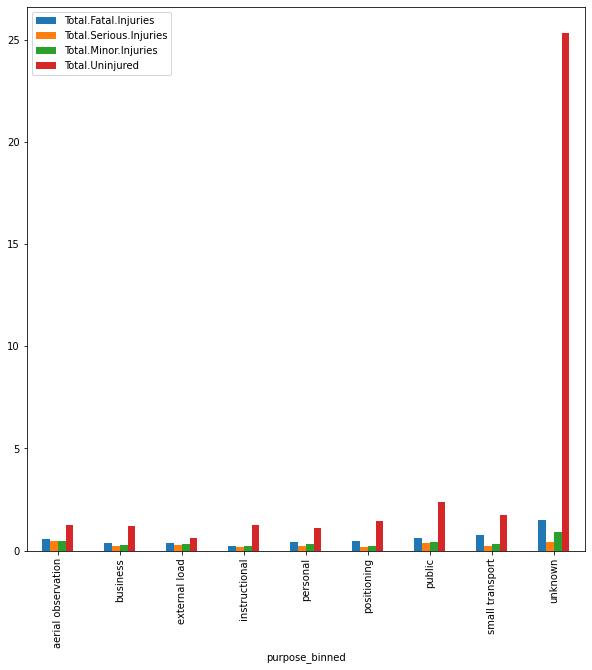

In [103]:
injury_df.plot(kind='bar', figsize=(10, 10))

<AxesSubplot:xlabel='purpose_binned'>

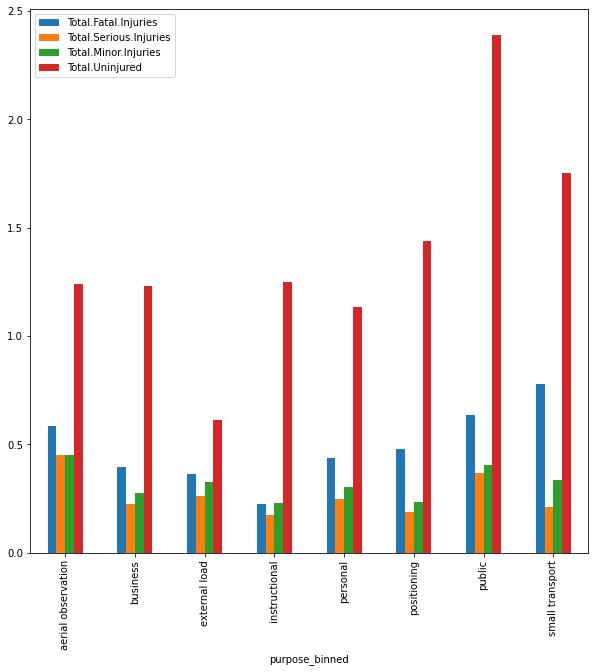

In [104]:
# Since the vast majority of accidents belong to the unknown category and have no serious injuries, we can drop that category and replot (for now).
injury_df.drop('unknown').plot(kind='bar', figsize=(10, 10))

<AxesSubplot:xlabel='purpose_binned'>

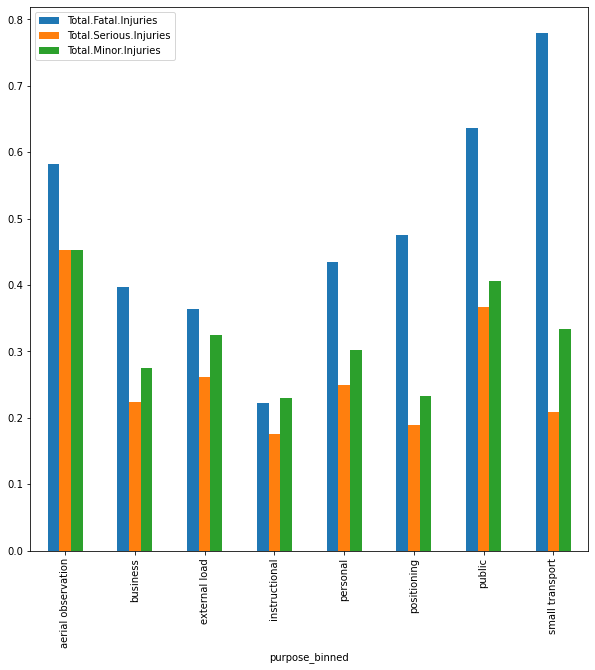

In [105]:
# Slightly more useful, but still not great. Let's try to drop the 'Total.Uninjured' column and replot.

injury_df.drop('unknown').drop('Total.Uninjured', axis=1).plot(kind='bar', figsize=(10, 10))



So we can see here that the safest category by far is instructional -- and especially when we look at fatal accidents. By contrast, small transport planes and aerial observation -- presumably sightseeing, and so perhaps best grouped with personal -- appear to be the most dangerous. Public planes have a high fatality rate, but that is likely at least partially explained by the fact that both military and firefighting planes are grouped into this category. 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [107]:
# New df that filters out if 'Amateur.Built' == True
df_amfilt = df[df['Amateur.Built'] == 'no'].copy()

# Check out 'Make' column in the df_amfilt. We still end up having a bunch of these weird, one-off entries at the bottom. 
df_amfilt['Make'].value_counts().tail(30)

vining john k                     1
abc                               1
phantom                           1
yakovlev/day                      1
cobb international                1
wheat                             1
allied ag cat productions         1
mielec                            1
arter warren                      1
walter tachiki                    1
airparts nz ltd                   1
british aerospace civil aircr     1
furche-bielsko                    1
czech                             1
kawasaki heavy industries ltd.    1
robinson helicopters              1
arrow-falcon exporters, inc.      1
ector aircraft company            1
bradshaw                          1
mckenzie john p                   1
clem william b iii                1
calypso                           1
aerosports connection             1
babenco henry d.                  1
maule aircraft corp               1
thunderbird aviation              1
columbia aircraft                 1
airmax construcoes aeronauti

In [108]:
# Going to try to filter out the one-off entries by first only keeping 'airplane' in 'Aircraft.Category'
df_pro_planes = df_amfilt[df_amfilt['Aircraft.Category'] == 'airplane'].copy()
# And fitlering Make column by those with at least 5 entries:
df_pro_planes = df_pro_planes.groupby('Make').filter(lambda x: len(x) >= 10)
# 
#len(df_pro_planes['Make'].unique())
df_pro_planes['Make'].value_counts()


cessna                            8443
piper                             4700
beech                             1684
boeing                            1309
mooney                             417
bellanca                           281
grumman                            249
airbus                             243
maule                              232
aeronca                            227
air tractor                        224
cirrus design corp                 220
air tractor inc                    219
champion                           169
luscombe                           163
embraer                            155
stinson                            145
cirrus                             137
north american                     118
mcdonnell douglas                  113
taylorcraft                        110
aero commander                     106
dehavilland                         95
de havilland                        88
aviat aircraft inc                  76
socata                   

In [109]:

# Make a list of all the entries that have "cessna" in them and return their strings in a list
cessna_list = df_pro_planes[df_pro_planes['Make'].str.contains('cessna')]['Make'].unique().tolist()

#Do the same with the other big makes
grumman_list = df_pro_planes[df_pro_planes['Make'].str.contains('grumman')]['Make'].unique().tolist()
dehavilland_list = df_pro_planes[df_pro_planes['Make'].str.contains('havilland')]['Make'].unique().tolist()
cirrus_list = df_pro_planes[df_pro_planes['Make'].str.contains('cirrus')]['Make'].unique().tolist()
piper_list = df_pro_planes[df_pro_planes['Make'].str.contains('piper')]['Make'].unique().tolist()
boeing_list = df_pro_planes[df_pro_planes['Make'].str.contains('boeing')]['Make'].unique().tolist()
mooney_list = df_pro_planes[df_pro_planes['Make'].str.contains('mooney')]['Make'].unique().tolist()
airtractor_list = df_pro_planes[df_pro_planes['Make'].str.contains('air tractor')]['Make'].unique().tolist()

print(cessna_list)
print(grumman_list)
print(dehavilland_list)
print(cirrus_list)
print(piper_list)
print(boeing_list)
print(mooney_list)
print(airtractor_list)

['cessna', 'cessna aircraft co', 'cessna aircraft company', 'cessna aircraft']
['grumman', 'grumman american', 'grumman-schweizer', 'grumman american avn. corp.', 'grumman acft eng cor-schweizer']
['de havilland', 'dehavilland']
['cirrus design corp.', 'cirrus', 'cirrus design corp', 'cirrus design corporation']
['piper', 'piper aircraft inc', 'piper aircraft corporation']
['boeing']
['mooney', 'mooney aircraft corp.', 'mooney airplane co inc']
['air tractor', 'air tractor inc']


In [110]:
#Use the above lists to group the 'Make' column:


df_pro_planes['Make'] = df_pro_planes['Make'].replace(cessna_list, 'cessna')
df_pro_planes['Make'] = df_pro_planes['Make'].replace(grumman_list, 'grumman')
df_pro_planes['Make'] = df_pro_planes['Make'].replace(dehavilland_list, 'dehavilland')
df_pro_planes['Make'] = df_pro_planes['Make'].replace(cirrus_list, 'cirrus')
df_pro_planes['Make'] = df_pro_planes['Make'].replace(piper_list, 'piper')
df_pro_planes['Make'] = df_pro_planes['Make'].replace(mooney_list, 'mooney')
df_pro_planes['Make'] = df_pro_planes['Make'].replace(airtractor_list, 'airtractor')


# And we can now see the totals, with slightly different numbers than before.
df_pro_planes['Make'].value_counts()

cessna                            8488
piper                             4738
beech                             1684
boeing                            1309
mooney                             461
airtractor                         443
grumman                            411
cirrus                             396
bellanca                           281
airbus                             243
maule                              232
aeronca                            227
dehavilland                        183
champion                           169
luscombe                           163
embraer                            155
stinson                            145
north american                     118
mcdonnell douglas                  113
taylorcraft                        110
aero commander                     106
aviat aircraft inc                  76
socata                              75
diamond aircraft ind inc            74
aviat                               70
ercoupe                  

<AxesSubplot:xlabel='Make'>

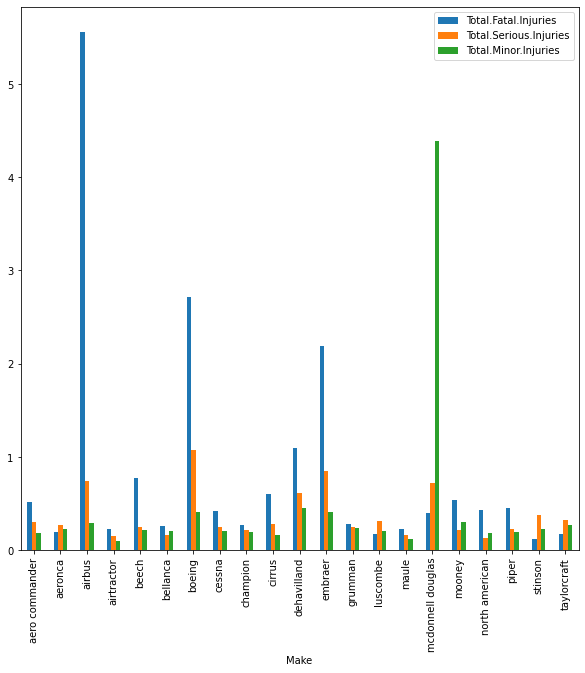

In [111]:
# Filter so we only have the at least 100 entries
df_makes = df_pro_planes.groupby('Make').filter(lambda x: len(x) >= 100)

df_makes = df_makes.groupby('Make').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'])
df_makes.plot(kind='bar', figsize=(10, 10))

In [112]:
df_makes = df_pro_planes.groupby('Make').filter(lambda x: len(x) >= 100)
df_makes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20175 entries, 5 to 88877
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                20175 non-null  object        
 1   Investigation.Type      20175 non-null  object        
 2   Accident.Number         20175 non-null  object        
 3   Event.Date              20175 non-null  datetime64[ns]
 4   Location                20171 non-null  object        
 5   Country                 20169 non-null  object        
 6   Latitude                15585 non-null  object        
 7   Longitude               15583 non-null  object        
 8   Airport.Code            12803 non-null  object        
 9   Airport.Name            13236 non-null  object        
 10  Injury.Severity         19480 non-null  object        
 11  Aircraft.damage         19122 non-null  object        
 12  Aircraft.Category       20175 non-null  object

<ipython-input-113-a7f300ef659f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df_makes['Make'], rotation=45)


[Text(0, 0, 'mcdonnell douglas'),
 Text(1, 0, 'cessna'),
 Text(2, 0, 'cessna'),
 Text(3, 0, 'bellanca'),
 Text(4, 0, 'cessna'),
 Text(5, 0, 'beech'),
 Text(6, 0, 'cessna'),
 Text(7, 0, 'cessna'),
 Text(8, 0, 'cessna'),
 Text(9, 0, 'cessna'),
 Text(10, 0, 'piper'),
 Text(11, 0, 'grumman'),
 Text(12, 0, 'cessna'),
 Text(13, 0, 'maule'),
 Text(14, 0, 'cessna'),
 Text(15, 0, 'bellanca'),
 Text(16, 0, 'cessna'),
 Text(17, 0, 'airtractor'),
 Text(18, 0, 'piper'),
 Text(19, 0, 'piper'),
 Text(20, 0, 'cessna')]

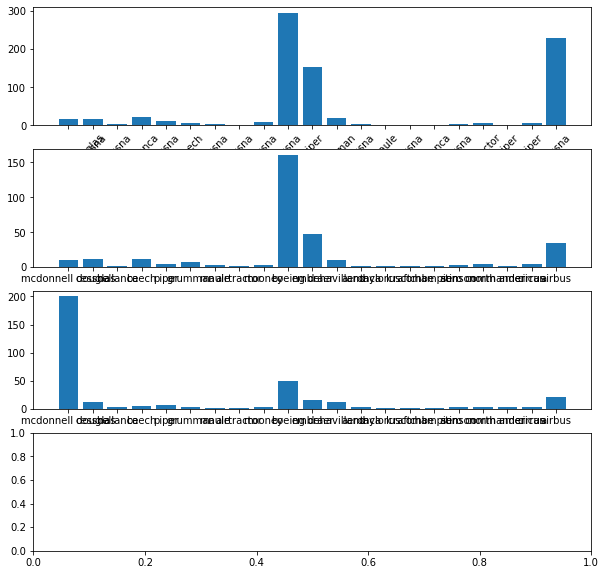

In [113]:


# create a figure and subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# create the bar charts
axs[0].bar(df_makes['Make'], df_makes['Total.Fatal.Injuries'])
axs[1].bar(df_makes['Make'], df_makes['Total.Serious.Injuries'])
axs[2].bar(df_makes['Make'], df_makes['Total.Minor.Injuries'])
#axs[3].bar(df_makes['Make'], df_makes['Aircraft.damage'])

# add titles and labels
#axs[0].set_title('Total Fatal Injuries by Make')
#axs[1].set_title('Total Serious Injuries by Make')
#axs[2].set_title('Total Minor Injuries by Make')
#axs[3].set_title('Aircraft Damage by Make')
#axs[3].set_xticklabels(df_makes['Make'], rotation=90)
#plt.tight_layout()
#plt.show()
axs[0].set_xticklabels(df_makes['Make'], rotation=45)

# axs.set_xticklabels(df_makes['Make'], rotation=45)


In [114]:
# df_makes['damage.value'].replace({
    'destroyed': 3,
    'substantial': 2,
    'minor': 1,
    'unknown': 0
})

df_make_damage = df_makes.groupby(['Make', 'Aircraft.damage']).count()
df_make_damage


IndentationError: unexpected indent (<ipython-input-114-4eb34bc1dd46>, line 2)

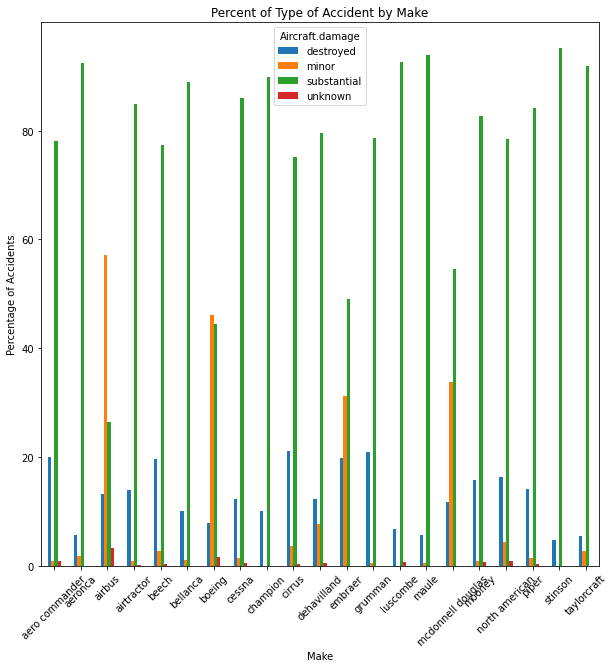

In [ ]:
#df_makes['Make']['Aircraft.damage'].value_counts()
#df_makes = df_pro_planes.groupby('Make').filter(lambda x: len(x) >= 100)

df_make_damage = df_makes.groupby(['Make', 'Aircraft.damage']).count()['Event.Id'].unstack()
df_make_damage = df_make_damage.div(df_make_damage.sum(axis=1), axis=0) * 100
df_make_damage.plot(kind='bar', figsize=(10, 10))

plt.xlabel('Make')
plt.ylabel('Percentage of Accidents')
plt.title('Percent of Type of Accident by Make')
plt.xticks(rotation=45)
plt.show()



In [ ]:
df_make_damage.head(10)

Aircraft.damage,destroyed,minor,substantial,unknown
Make,,,,
aero commander,20.000000,0.952381,78.095238,0.952381
aeronca,5.726872,1.762115,92.511013,NaN
airbus,13.186813,57.142857,26.373626,3.296703
airtractor,14.027149,0.904977,84.841629,0.226244
beech,19.578313,2.710843,77.409639,0.301205
bellanca,10.000000,1.071429,88.928571,NaN
boeing,7.938719,46.100279,44.428969,1.532033
cessna,12.256833,1.360544,85.929108,0.453515
champion,10.119048,NaN,89.880952,NaN


pilot                                     258
american airlines                          90
united airlines                            89
delta air lines                            53
delta air lines inc                        44
southwest airlines co                      44
american airlines inc                      36
on file                                    33
ryanair                                    27
private individual                         27
continental airlines                       27
american airlines, inc.                    25
usair                                      24
united air lines inc                       23
southwest airlines                         23
continental airlines, inc.                 21
air methods corp                           20
air canada                                 20
civil air patrol inc                       17
unknown                                    17
skywest airlines inc                       16
british airways                   

In [ ]:
df1 = pd.read_csv('../data/AviationData_cleaned.csv', encoding='latin-1')
df1.head()

c:\Users\nateh\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,State.Code,State.Name,purpose_binned,Num.Fatalities
0,20170710x52551,accident,nyc79aa106,1979-09-17,"boston, ma",united states,42.445277000000004,-70.758333,NaN,NaN,...,44.0,VMC,climb,probable cause,19-09-2017,1979,MA,Massachusetts,NaN,0
1,20020909x01562,accident,sea82da022,1982-01-01,"pullman, wa",united states,NaN,NaN,NaN,blackburn ag strip,...,2.0,VMC,takeoff,probable cause,01-01-1982,1982,WA,Washington,personal,0
2,20020909x01561,accident,nyc82da015,1982-01-01,"east hanover, nj",united states,NaN,NaN,n58,hanover,...,2.0,IMC,landing,probable cause,01-01-1982,1982,NJ,New Jersey,business,0
3,20020917x02148,accident,ftw82frj07,1982-01-02,"homer, la",united states,NaN,NaN,NaN,NaN,...,0.0,IMC,cruise,probable cause,02-01-1983,1982,LA,Louisiana,personal,0
4,20020917x02134,accident,ftw82fra14,1982-01-02,"hearne, tx",united states,NaN,NaN,t72,hearne municipal,...,0.0,IMC,takeoff,probable cause,02-01-1983,1982,TX,Texas,personal,1


In [ ]:
# Make a DS.Score based on the 'Aircraft.damage' column


df1['DS.Score'] = df1['Aircraft.damage'].replace({
    'destroyed': 2,
    'substantial': 1,
    'minor': 0,
})
df1['DS.Score'].value_counts()

1          17817
2           2304
0            481
unknown       40
Name: DS.Score, dtype: int64

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21121 entries, 0 to 21120
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                21121 non-null  object 
 1   Investigation.Type      21121 non-null  object 
 2   Accident.Number         21121 non-null  object 
 3   Event.Date              21121 non-null  object 
 4   Location                21121 non-null  object 
 5   Country                 21121 non-null  object 
 6   Latitude                17946 non-null  object 
 7   Longitude               17939 non-null  object 
 8   Airport.Code            14817 non-null  object 
 9   Airport.Name            15226 non-null  object 
 10  Injury.Severity         21040 non-null  object 
 11  Aircraft.damage         20642 non-null  object 
 12  Aircraft.Category       21121 non-null  object 
 13  Registration.Number     21114 non-null  object 
 14  Make                    21121 non-null

In [ ]:
df1['Total.Fatal.Injuries'].value_counts()

0.0      15371
1.0       1613
2.0        941
3.0        283
4.0        187
5.0         58
6.0         32
7.0         15
8.0         10
10.0         8
9.0          4
12.0         3
11.0         2
14.0         2
16.0         1
17.0         1
49.0         1
27.0         1
228.0        1
13.0         1
65.0         1
Name: Total.Fatal.Injuries, dtype: int64

In [ ]:
# Check if each instance of 'Total.Fatal.Injuries' equals 'Num.Fatalities'
df1['Fatalities.Match'] = df1['Total.Fatal.Injuries'] == df1['Num.Fatalities']
df1['Fatalities.Match'].value_counts()

True     16103
False     5018
Name: Fatalities.Match, dtype: int64